# Hypothesis

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

stack_overflow = pd.read_feather('datasets/stack_overflow.feather')

stack_overflow.head()

,respondent,main_branch,hobbyist,age,age_1st_code,age_first_code_cut,comp_freq,comp_total,converted_comp,country,...,survey_length,trans,undergrad_major,webframe_desire_next_year,webframe_worked_with,welcome_change,work_week_hrs,years_code,years_code_pro,age_cat
0,36.0,"I am not primarily a developer, but I write co...",Yes,34.0,30.0,adult,Yearly,60000.0,77556.0,United Kingdom,...,Appropriate in length,No,"Computer science, computer engineering, or sof...",Express;React.js,Express;React.js,Just as welcome now as I felt last year,40.0,4.0,3.0,At least 30
1,47.0,I am a developer by profession,Yes,53.0,10.0,child,Yearly,58000.0,74970.0,United Kingdom,...,Appropriate in length,No,"A natural science (such as biology, chemistry,...",Flask;Spring,Flask;Spring,Just as welcome now as I felt last year,40.0,43.0,28.0,At least 30
2,69.0,I am a developer by profession,Yes,25.0,12.0,child,Yearly,550000.0,594539.0,France,...,Too short,No,"Computer science, computer engineering, or sof...",Django;Flask,Django;Flask,Just as welcome now as I felt last year,40.0,13.0,3.0,Under 30
3,125.0,"I am not primarily a developer, but I write co...",Yes,41.0,30.0,adult,Monthly,200000.0,2000000.0,United States,...,Appropriate in length,No,None,None,None,Just as welcome now as I felt last year,40.0,11.0,11.0,At least 30
4,147.0,"I am not primarily a developer, but I write co...",No,28.0,15.0,adult,Yearly,50000.0,37816.0,Canada,...,Appropriate in length,No,"Another engineering discipline (such as civil,...",None,Express;Flask,Just as welcome now as I felt last year,40.0,5.0,3.0,Under 30


In [39]:
# Hypothesis:
#* The mean annual compensation of the population of data scientist is $110,000
mean_comp_hyp = 110000 # Hypothesis mean

mean_comp_samp = stack_overflow['converted_comp'].mean() # Sample mean
print(f'{mean_comp_samp:.2f}')

119574.72


In [40]:
so_boot_distn = []
for i in range(5000):
    so_boot_distn.append(
        np.mean(
            stack_overflow.sample(frac = 1, replace = True)['converted_comp']
        )
    )

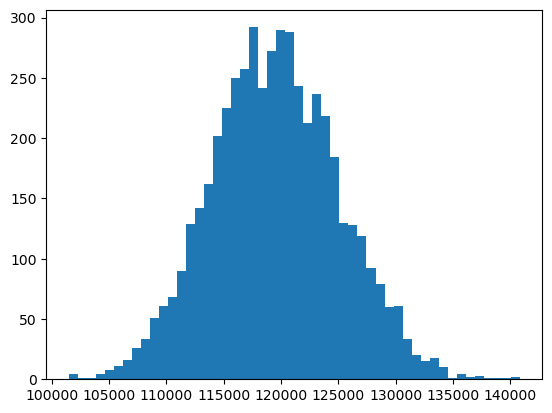

In [41]:
plt.hist(so_boot_distn, bins = 50)
plt.show()

In [42]:
# Standard error
std_error = np.std(so_boot_distn, ddof = 1) # Standard error
print(f'{std_error:.2f}')

5534.41


We need to calculate z-score

In [43]:
z_score = (mean_comp_samp - mean_comp_hyp) / std_error
print(z_score)

1.7300334828975892


> hypothesis is a statement about an unnown population parameter  
>
> A hypothesis is a test of two competing hypotheses
> - The **null** hypotheses (H0) is the existing idea
> - The **alternative** hypothesis (HA) is the new 'challenger' idea of the researcher

In [60]:
# H0 => The proportion of data scientists staring proggramming as children is 35%
prop_child_hyp = 0.35
#HA => The proportion of data scientists staring proggramming as children is greater 35%

prop_child_samp = (stack_overflow['age_first_code_cut'] == 'child').mean()
print({f'Proportion of data scientisf who started programming as children {prop_child_samp:.3f}'})

{'Proportion of data scientisf who started programming as children 0.391'}


In [61]:
first_code_boot_distn = []

for i in range(5000):
    first_code_boot_distn.append(
        (stack_overflow['age_first_code_cut'] == 'child').sample(frac = 1, replace = True).mean()
    )


In [62]:

std_error = np.std(first_code_boot_distn, ddof = 1)
print(f'{std_error:.3f}')

0.010


In [64]:
z_score = (prop_child_samp - prop_child_hyp) / std_error
print(z_score)

3.9512820065929355


##### Calculate the p-value

In [ ]:
from scipy.stats import norm

# Left-tailed test => use norm.cdf
#* WE evaluate left tail when the alternative hypothesis is less than

# Right-tailed test => use  1 - norm.cdf
#* We evaluate right tail when the alternative hypothesis is greater than

p_val = 1 - norm.cdf(z_score, loc = 0, scale = 1)

print(f'{p_val}')

3.8866829898398514e-05


#### Statistical significance  

P-values quantify evidence for the null hypothesis
Large p-value => fail to reject null hypothesis  
Small p-value => reject null hypothesis

**Significance level** of a hypotheiss test is the threshold point for 'beyond a reasonable doubt'
Common values of significance: 0.2, 0.1, 0.05 and 0.01


In [ ]:
alpha = 0.05  # Significance level 

if p_val <= alpha:
    print('Reject H0')
else:
    print('Fail to reject H0')

Reject H0


#### Confidence intervals
For a significace level of alpha, it´s coomon to choose a confidence interval level of 1 - alpha

- alpha = 0.05 => 95% confidence interval

In [72]:
lower = np.quantile(first_code_boot_distn, 0.025)
upper = np.quantile(first_code_boot_distn, 0.975)
print(f'{lower:.3f}, {upper:.3f}')

0.371, 0.412


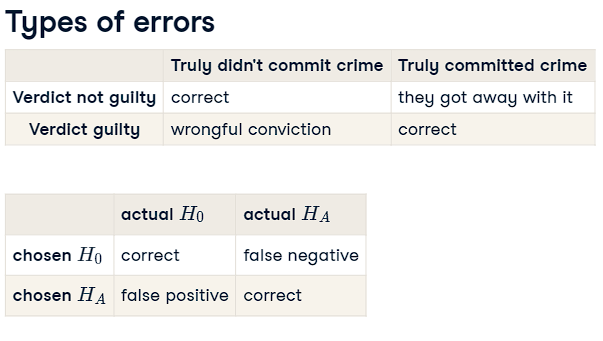

>## Late Shipment

In [44]:
late_shipments = pd.read_feather('datasets/late_shipments.feather')

In [45]:
# Print the late_shipments dataset
late_shipments.head()

# Calculate the proportion of late shipments
late_prop_samp = (late_shipments['late'] == 'Yes').mean()

# Print the results
print(late_prop_samp)

0.061


In [46]:
# Hypothesize that the proportion is 6%
late_prop_hyp = 0.06

late_shipments_boot_distn = []
for i in range(5000):
    late_shipments_boot_distn.append(
        np.mean(
            late_shipments.sample(frac = 1, replace = True)['late'] == 'Yes'
        )
    )

In [47]:
# Hypothesize that the proportion is 6%
late_prop_hyp = 0.06

# Calculate the standard error
std_error = np.std(late_shipments_boot_distn, ddof=1)

# Find z-score of late_prop_samp
z_score = (late_prop_samp - late_prop_hyp) / std_error

# Print z_score
print(z_score)

0.13376400038859998
